In [70]:
import wandb

# Initialize API (make sure you're logged in or set the API key)
wandb.login()

# Replace with your entity, project, and run ID
api = wandb.Api()

# Get all runs of the project that didn't crash
runs = api.runs(
    "rl-sunflower/tabpfn-time-series",
    # filters={"$and": [{"state": "finished"}, {"group": {"$in": ["11546127", "11548929"]}}]}
    filters={"group": {"$in": ["11550610", "11549116"]}},   
)


In [71]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

import pandas as pd

def fetch_run_data(run):
    history = run.history()
    
    if len(history) > 1:
        # get the first row
        history = history.iloc[-1:]
    return history

# time the following code
import time
start = time.time()

all_runs_data = []
with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust 'max_workers' based on your network conditions
    futures = [executor.submit(fetch_run_data, run) for run in runs]
    for future in tqdm(as_completed(futures), total=len(futures)):
        all_runs_data.append(future.result())

df_all_runs = pd.concat(all_runs_data)
print("df_all_runs.shape:", df_all_runs.shape)

print(f"Time taken: {time.time() - start:.2f} seconds")

100%|██████████| 58/58 [00:03<00:00, 18.67it/s]

df_all_runs.shape: (58, 27)
Time taken: 4.03 seconds


In [72]:
df_all_runs

,app_version,job_id,utc,constraint,result,duration,seed,version,_timestamp,framework,...,task,log,predict_duration,params,models_count,_step,info,mode,_runtime,id
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T07:01:05,4h16c,-1.06571,66.6,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,web_traffic_weekly,None,6.5,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,132.508153,web_traffic_weekly
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:58:34,4h16c,-1.01128,3.7,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,nn5_daily,None,0.4,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,7.190236,nn5_daily
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:59:04,4h16c,-3.55201,4.1,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,tourism_yearly,None,0.4,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,7.403938,tourism_yearly
7,NaN,None,NaN,None,NaN,NaN,NaN,NaN,1.717398e+09,None,...,None,\nERROR:\nNo task available.,NaN,NaN,NaN,7,NaN,NaN,2.568785,NaN
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:59:55,4h16c,-1.07909,42.8,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,m4_monthly,None,3.2,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,90.618968,m4_monthly
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:58:34,4h16c,-1.06285,3.7,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,nn5_weekly,None,0.4,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,6.925324,nn5_weekly
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:59:04,4h16c,-1.30223,4.0,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,vehicle_trips,None,0.4,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,7.450591,vehicle_trips
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:58:51,4h16c,-1.60225,12.5,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,m4_quarterly,None,1.5,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,24.868706,m4_quarterly
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:58:54,4h16c,-0.369195,11.4,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,pedestrian_counts,None,0.9,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,28.752257,pedestrian_counts
13,dev [git@github.com:liam-sbhoo/automlbenchmark...,None,2024-06-03T06:58:08,4h16c,-3.96595,7.0,0.0,1.7.5,1.717398e+09,SeasonalNaive,...,m4_yearly,None,1.2,{'model_name': 'SeasonalNaive'},1.0,13,NaN,local,12.972211,m4_yearly


In [73]:
# Preprocess data (convert to float, NaN value -> inf)
numerical_cols = ['mase', 'wql', 'duration', 'result']
for col in numerical_cols:
    df_all_runs[col] = df_all_runs[col].astype(float)
    df_all_runs[col] = df_all_runs[col].fillna(float('inf'))

In [74]:
# tabpfn_runs = df_all_runs[df_all_runs["framework"] == "TabPFN"]
df_sorted = df_all_runs.sort_values(by='task')

# drop index
df_sorted.reset_index(drop=True, inplace=True)

# Plotting

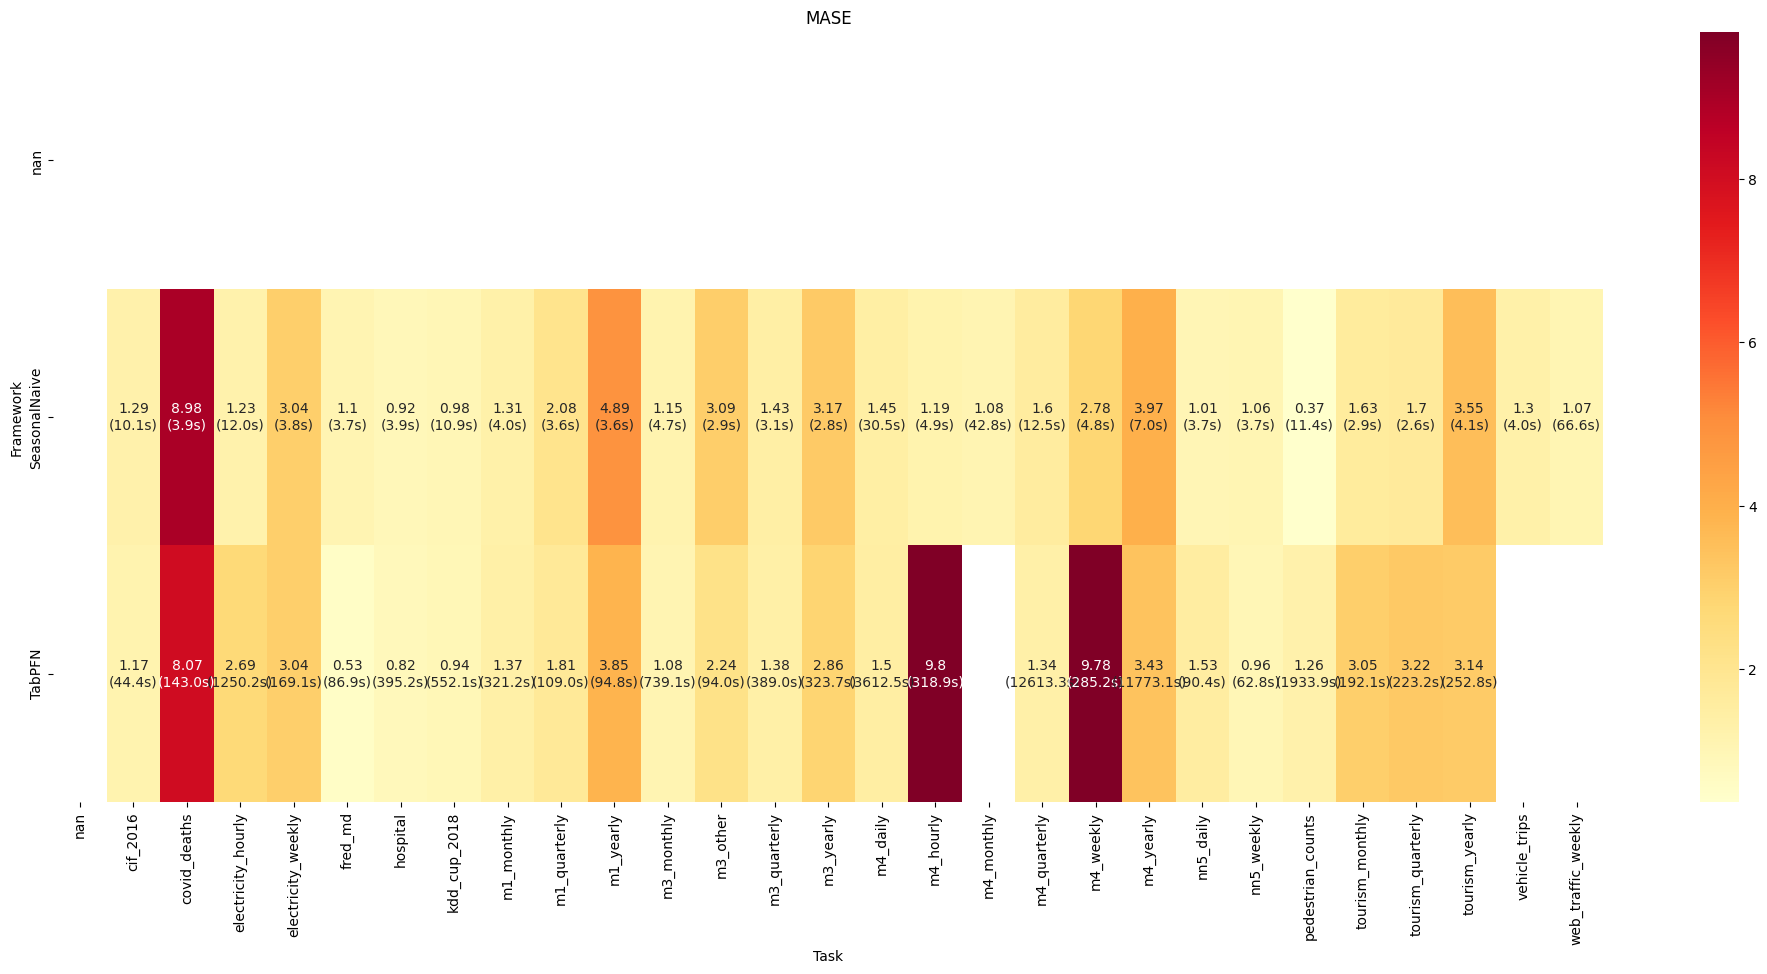

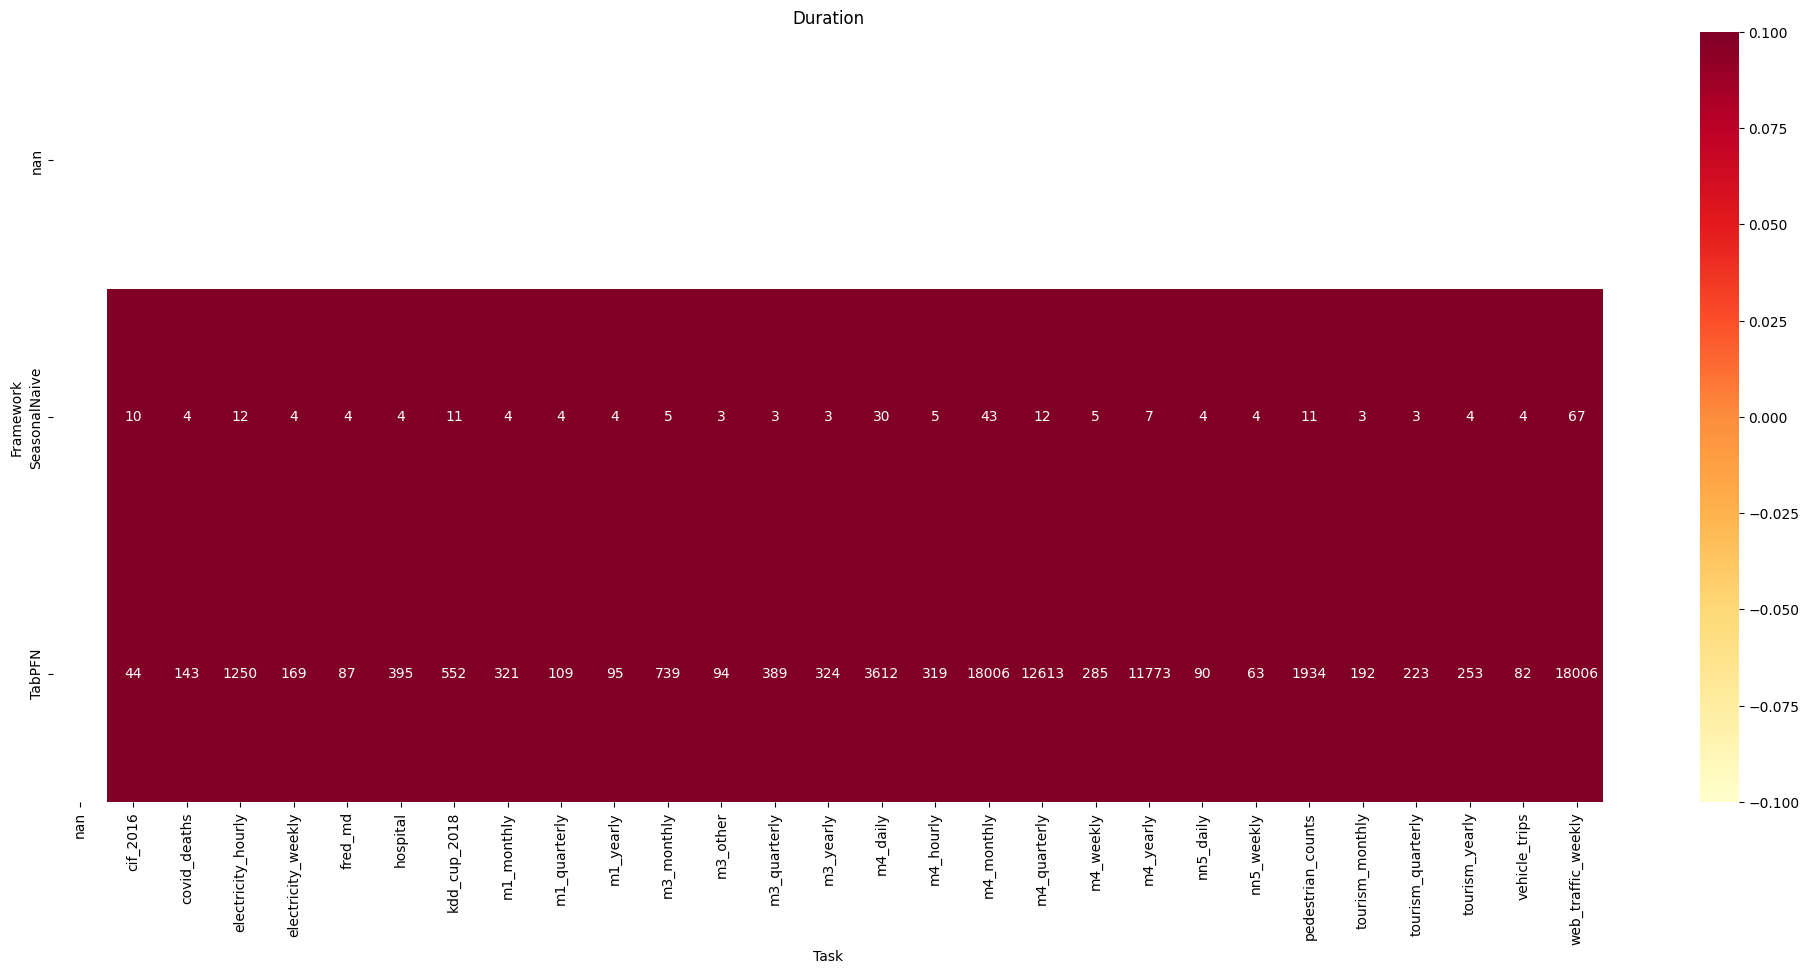

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the same data with heatmap (mase as color)
#  - y-axis: frameworks
#  - x-axis: tasks

# Get relevant columns only
df_rel = df_sorted[['framework', 'task', 'mase', 'wql', 'duration']]
df_rel = df_rel.drop_duplicates(subset=["framework", "task"], keep='first')

# Pivot the data and create a dataframe with random values
df_mase_pivot = df_rel.pivot(index='framework', columns='task', values='mase').astype(float).replace(float('inf'), float('nan'))
df_random_pivot = pd.DataFrame(np.random.rand(*df_mase_pivot.shape), index=df_mase_pivot.index, columns=df_mase_pivot.columns)

# Customized annotation (each cell shuold be value of mase and total duration as a subtext)
df_duration = df_rel.pivot(index='framework', columns='task', values='duration').astype(float)
df_mase_annot = df_mase_pivot.round(2).astype(str) + f"\n(" + df_duration.astype(str) + "s)"

def plot_heatmap(data, title, xlabel, ylabel, annot_format=".0f", cmap='YlOrRd', annot=True):
    """
    Plots a heatmap for given data.

    Parameters:
    - data: DataFrame containing the data to be plotted.
    - title: str, title of the heatmap.
    - xlabel: str, label for the x-axis.
    - ylabel: str, label for the y-axis.
    - annot_format: str, format string for annotations.
    - cmap: str, colormap used for heatmap.
    - annot: bool, whether to annotate cells.
    """
    plt.figure(figsize=(25, 10))
    sns.heatmap(data, cmap=cmap, annot=annot, fmt=annot_format)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

# Example usage with MASE data
plot_heatmap(df_mase_pivot, "MASE", "Task", "Framework", "s", annot=df_mase_annot)

# Example usage with Duration data
plot_heatmap(df_duration, "Duration", "Task", "Framework", ".0f")




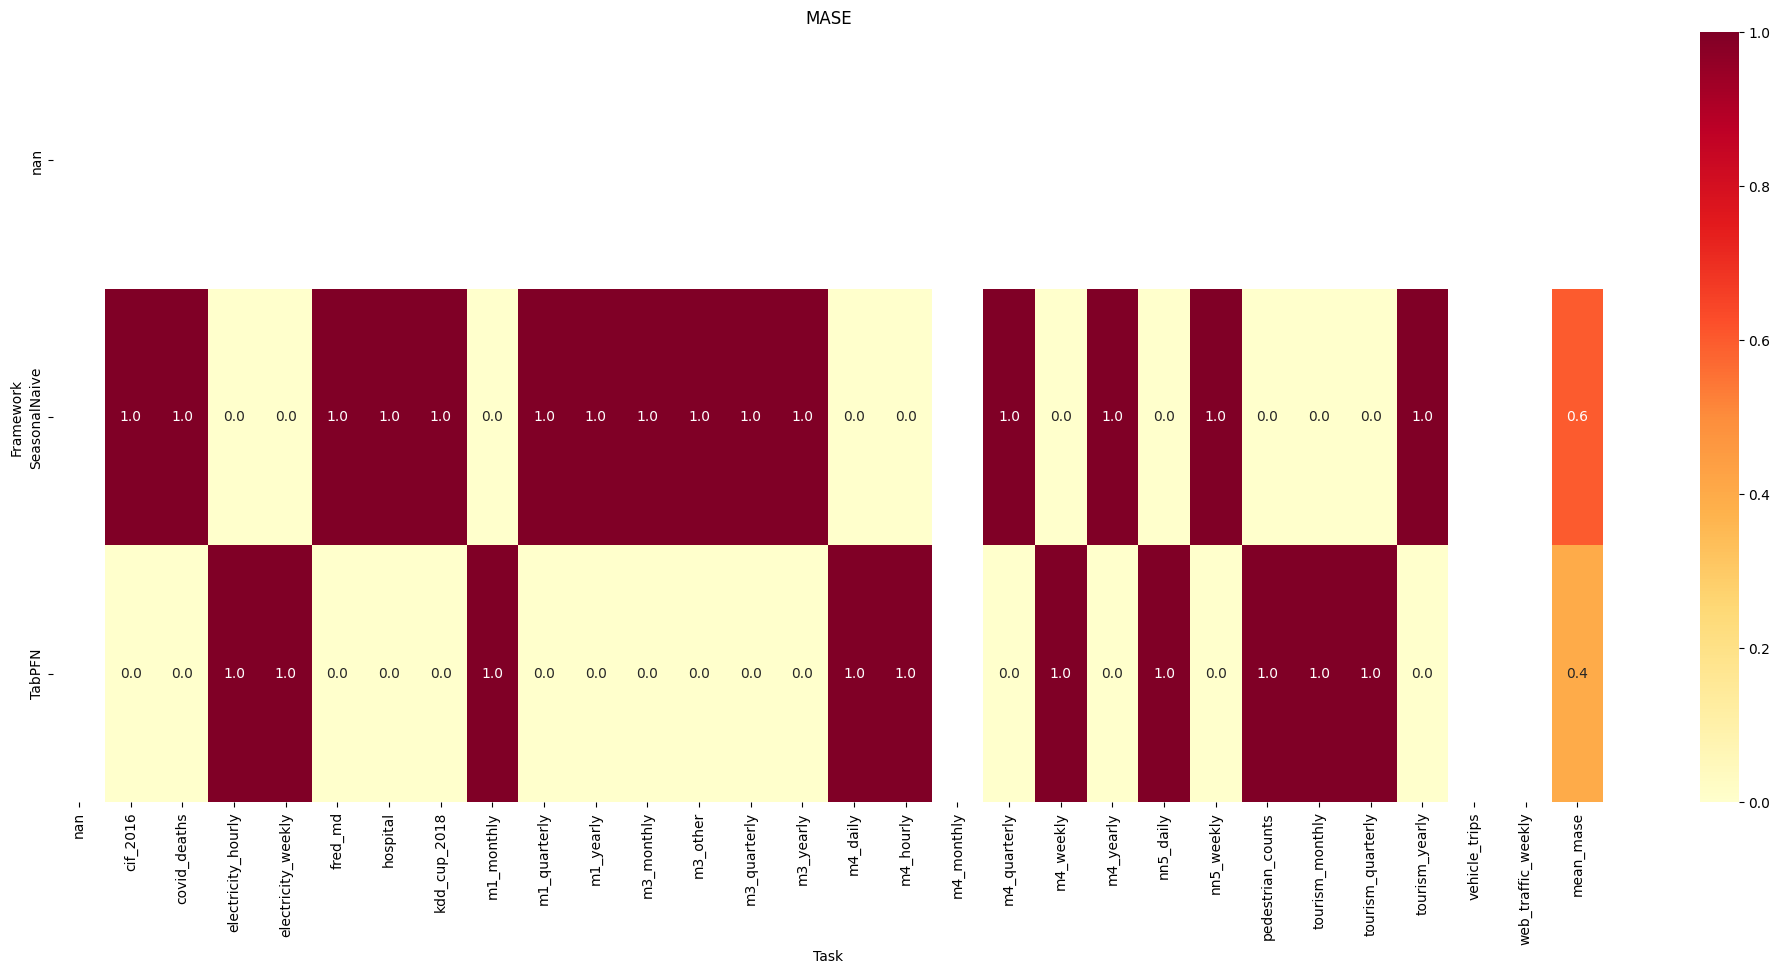

In [76]:
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

df_mase_pivot_scaled = df_mase_pivot.apply(min_max_scaling, axis=0)
df_mase_pivot_scaled['mean_mase'] = df_mase_pivot_scaled.mean(axis=1)

plot_heatmap(df_mase_pivot_scaled, "MASE", "Task", "Framework", annot_format=".1f")


In [77]:
df_mase_pivot.head()

task,NaN,cif_2016,covid_deaths,electricity_hourly,electricity_weekly,fred_md,hospital,kdd_cup_2018,m1_monthly,m1_quarterly,...,m4_weekly,m4_yearly,nn5_daily,nn5_weekly,pedestrian_counts,tourism_monthly,tourism_quarterly,tourism_yearly,vehicle_trips,web_traffic_weekly
framework,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeasonalNaive,NaN,1.28929,8.97736,1.23011,3.03717,1.100800,0.920528,0.975216,1.31446,2.07754,...,2.77730,3.96595,1.01128,1.062850,0.369195,1.63094,1.69899,3.55201,1.30223,1.06571
TabPFN,NaN,1.17199,8.06867,2.68729,3.04027,0.525854,0.820611,0.941433,1.37408,1.80553,...,9.78028,3.42689,1.52775,0.959512,1.260750,3.05386,3.22448,3.13795,NaN,NaN


In [78]:
import numpy as np

N_ROW = 10
N_COL = df_mase_pivot.shape[1]

# Create frameworks from random strings
frameworks = [f"framework_{i}" for i in range(N_ROW)]

df_random_pivot = pd.DataFrame(np.random.rand(N_ROW, N_COL), columns=df_mase_pivot.columns, index=frameworks)
df_random_pivot.index.name = "framework"


In [79]:
df_random_pivot

task,NaN,cif_2016,covid_deaths,electricity_hourly,electricity_weekly,fred_md,hospital,kdd_cup_2018,m1_monthly,m1_quarterly,...,m4_weekly,m4_yearly,nn5_daily,nn5_weekly,pedestrian_counts,tourism_monthly,tourism_quarterly,tourism_yearly,vehicle_trips,web_traffic_weekly
framework,,,,,,,,,,,,,,,,,,,,,
framework_0,0.128607,0.449120,0.691526,0.350090,0.400915,0.718482,0.028362,0.216853,0.295172,0.543116,...,0.855685,0.555472,0.555819,0.568014,0.820639,0.013458,0.957647,0.261258,0.859382,0.325787
framework_1,0.730814,0.532324,0.673107,0.838976,0.271060,0.198378,0.780586,0.235363,0.524027,0.791358,...,0.303222,0.476619,0.876840,0.693140,0.553061,0.866108,0.597618,0.984599,0.425852,0.795745
framework_2,0.268951,0.863497,0.679472,0.818195,0.575863,0.656859,0.284988,0.035403,0.466753,0.899915,...,0.832766,0.496351,0.265942,0.641796,0.931726,0.821460,0.968705,0.200624,0.670614,0.238331
framework_3,0.081481,0.908476,0.529289,0.719734,0.404364,0.772687,0.283397,0.728071,0.783361,0.896154,...,0.439303,0.231019,0.025819,0.297144,0.179483,0.861314,0.601726,0.214327,0.400411,0.406919
framework_4,0.963819,0.713938,0.040846,0.210808,0.630917,0.609583,0.178542,0.333169,0.344947,0.340329,...,0.253618,0.930605,0.154144,0.966669,0.965628,0.625006,0.931418,0.349679,0.327943,0.037263
framework_5,0.998373,0.677496,0.509532,0.185029,0.246573,0.308478,0.985140,0.673233,0.162524,0.822010,...,0.219328,0.794679,0.163637,0.331971,0.596492,0.755821,0.729668,0.720682,0.874754,0.988480
framework_6,0.912593,0.584242,0.290747,0.927825,0.540469,0.911580,0.222093,0.474136,0.042743,0.599619,...,0.831669,0.255534,0.623396,0.598114,0.854991,0.928706,0.649040,0.490874,0.437935,0.972388
framework_7,0.926141,0.574949,0.656205,0.457935,0.198653,0.139725,0.537942,0.866553,0.209245,0.557235,...,0.102842,0.122845,0.543438,0.830758,0.642615,0.200426,0.766562,0.321935,0.711636,0.798472
framework_8,0.526194,0.908517,0.328064,0.663703,0.202599,0.562963,0.391504,0.060458,0.466957,0.082708,...,0.514983,0.346738,0.585968,0.842245,0.062031,0.290504,0.468418,0.133483,0.290960,0.618703


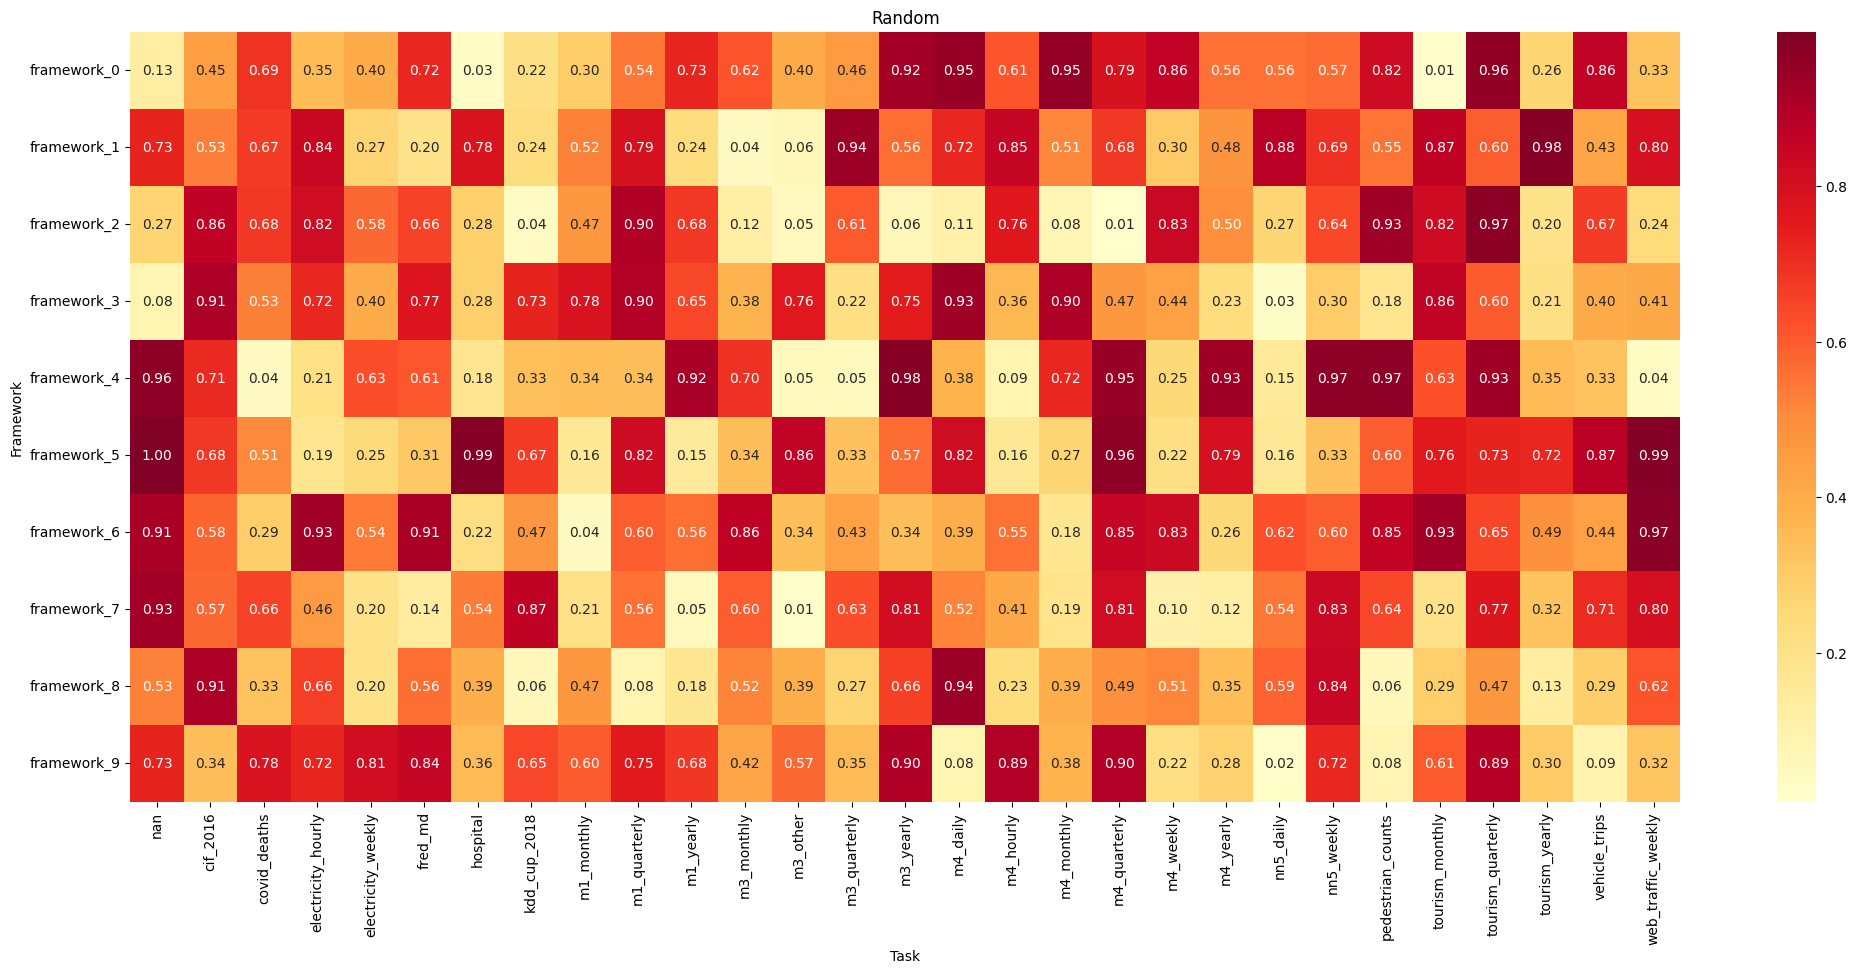

In [80]:
# plot df_random_pivot with heatmap
plot_heatmap(df_random_pivot, "Random", "Task", "Framework", annot_format=".2f")



In [81]:
def calculate_framework_metrics(df):
    """
    Calculate the following metrics for the given dataframe:
    1. Average rescaled MASE (across all tasks) for each framework
    2. Average rank (across all tasks) for each framework
    3. Champion count (number of times a framework had the best performance across all tasks)

    Parameters:
    df (pd.DataFrame): DataFrame containing the rescaled MASE values for each framework and task.

    Returns:
    pd.DataFrame: DataFrame with 'average_rescaled_mase', 'average_rank', and 'champion' for each framework.
    """
    frameworks = df.index
    df_metric = pd.DataFrame(index=frameworks, columns=['average_rescaled_mase', 'average_rank', 'champion'])

    df_metric['average_rescaled_mase'] = df.mean(axis=1)
    df_metric['average_rank'] = df.rank(axis=0, na_option='keep').mean(axis=1)
    df_metric['champion'] = (df.rank(axis=0, method='min', ascending=True) == 1).sum(axis=1)
    
    return df_metric


In [82]:
calculate_framework_metrics(df_mase_pivot)

,average_rescaled_mase,average_rank,champion
framework,,,
NaN,NaN,NaN,0
SeasonalNaive,2.086139,1.535714,13
TabPFN,2.834911,1.400000,15
